# 자동차 연비 예측 분석 (회귀분석)

#### 자동차 연비 데이터에 머신러닝 기반의 회귀 분석을 수행하여 연비에 영향을 미치는 항목을 확인하고, 
#### 그에 따른 자동차 연비를 예측한다.

In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 


## 데이터 수집

In [ ]:
import numpy as np
import pandas as pd

data_df = pd.read_csv('C:/Users/kaitnam/Documents/데이터 과학 기반의 파이썬 빅데이터 분석_한빛/My_Python/10장_data/auto-mpg.csv', header = 0, engine = 'python')

#header = 0은 파일의 첫 번째 줄에 열 이름이 있음을 나타낸다. 그렇기에 0번째 column부터 나오고
#만약 header = 2라고 넣어주면 15.0 8 307.0 130 3504.... 이게 첫번째 열로 주어지고 결과같이 나온다.
#csv 포멧의 파일을 Parsing 하는 과정에서 에러가 날 수 있기 때문에 engine = 'python' 이렇게 붙여준다.


## 데이터 준비 및 탐색

In [3]:
print('데이터셋 크기: ', data_df.shape) # 398행과 9열로 구성되어 있다. 
data_df.head()

데이터셋 크기:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### - 분석하지 않을 변수 제외

In [4]:
# feature 중에 car_name, origin, horsepower는 분석에 사용하지 않으므로 제거 후 확인한다.

data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False )
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [5]:
print(data_df.shape)

(398, 6)


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB



## 분석 모델 구축

In [7]:
# 선형 회귀 분석 모델 구축하기

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [9]:
# 선형 회귀 분석 모델 객체인 lr을 생성한다.

lr = LinearRegression()


In [10]:
# 학습 데이터 X (X_train)와 Y (Y_train)을 가지고 학습을 수행한다. fit()

lr.fit(X_train, Y_train)


LinearRegression()

In [11]:
# 선형 회귀 분석 : 평가 데이터(X_test)로 예측을 수행 -> 예측 결과 Y_predict 구하기

Y_predict = lr.predict(X_test)



## 결과 분석

In [18]:
# 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 Y (Y_test)를 이미 알고있다. 
# 평가 데이터의 결과값 (Y_test)과 예측 결과값 (Y_predict)의 오차를 계산하여 모델을 평가하는데, 
# mean_squared_error()를 이용하여 평가 지표 MSE를 구하고 구한 값의 제곱근을 계산하여 평가지표 RMSE를 구한다.
# 그리고 r2_score()를 이용하여 평가 지표 R^2를 구한다.

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [19]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [20]:
# 회귀 모델에서 구한 회귀 계수 값(lr.coef_)과 피처 이름(X_columns)을 묶어서 Series 자료형으로 만들고,
# 회귀 계수 값을 기준으로 내림차순(ascending = False)으로 정렬(sort_values()) 하여 회귀 계수 값이 큰 항목을 확인한다.

coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [ ]:
# 회귀 모델 결과로 자동차 연비를 예측하는 회귀식을 정리

Ympg = -0.14 X_cylinders + 0.01 X_diaplacement - 0.01 X_weight + 0.20 X_acceleration + 0.76 X_model_year - 17.55(Y 절편)


## 결과 시각화

In [21]:
# 피처 중에서 타깃인 mpg를 제외하고 개의 피처가 회귀 분석에 미치는 영향을 시각화하여 알아본다.

import matplotlib.pyplot as plt
import seaborn as sns


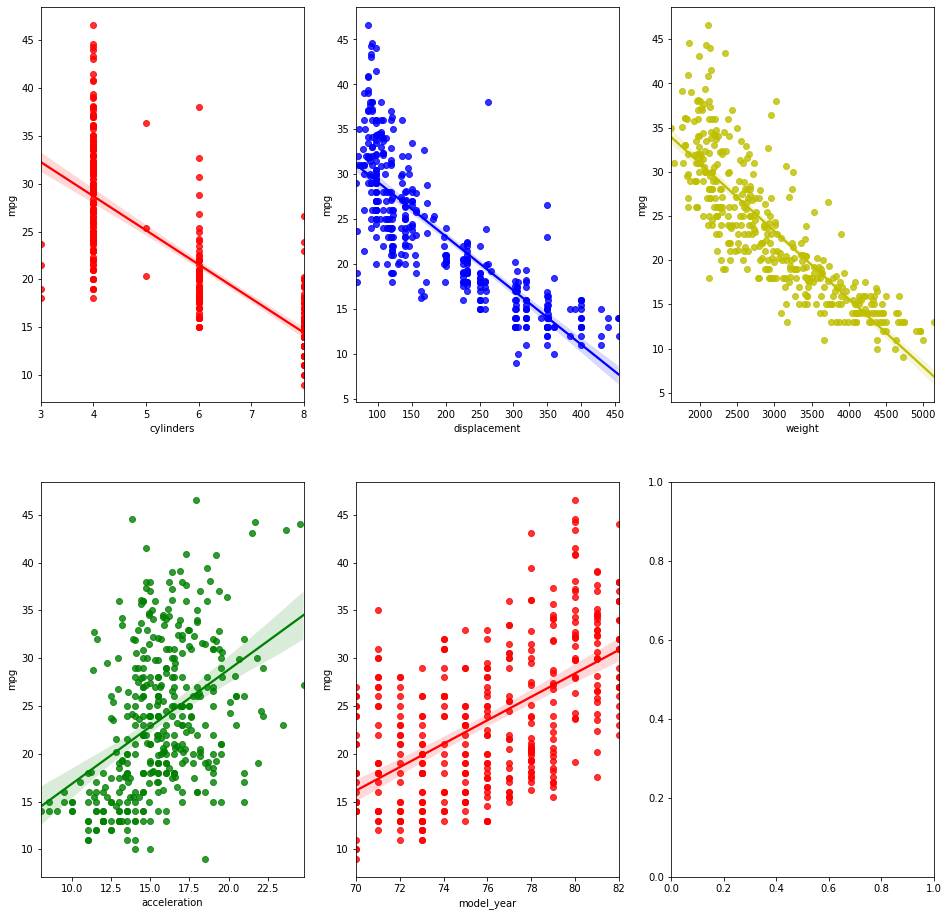

In [24]:
# subplots()를 사용하요 독립 변수인 5개의 features 와 종속변수인 연비(mpg)와의 회귀 관계를 보여주는 5개 그래프를 2행 3열 구조로 나타냄

flg, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
X_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(X_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

##### model_year가 클수록, 즉 최신 모델일수록, 그리고 acceleration이 높을수록, 즉 가속능력이 높을수록 자동차 연비가 높다
##### 반대로 displacement(배기량), weight(차의 무게), cylinders(실린더 수)가 낮을수록 자동차 연비가 높다.
##### 이러한 분석 결과는 연비가 높은 자동차를 선택할 때 활용할 수 있다.


## 연비 예측

In [25]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99


In [27]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]])

In [28]:
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

이 자동차의 예상 연비(MPG)는 41.32입니다.
